In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [3]:
df = pd.read_csv('Diamonds Prices2022.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,26972.000000,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,15572.147122,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13486.500000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26972.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.500000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,53943.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [7]:
df = df.drop('Unnamed: 0', axis=1)

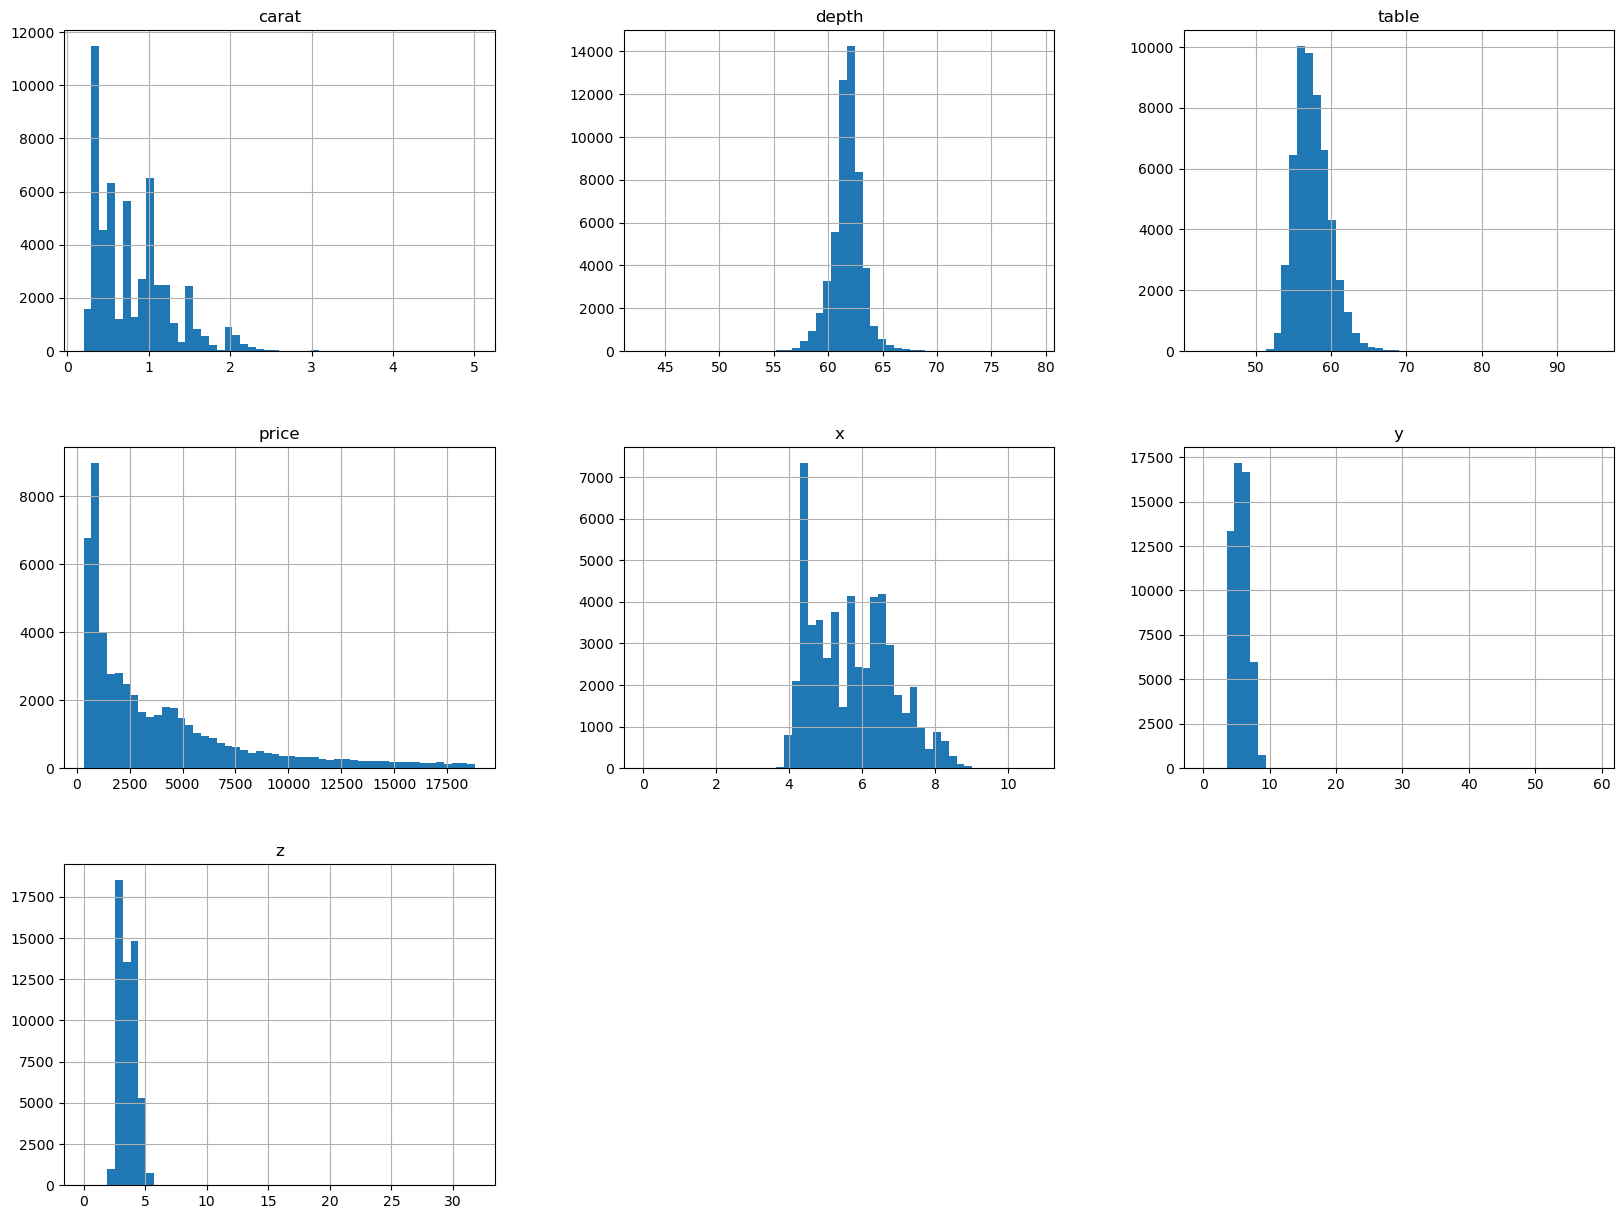

In [8]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

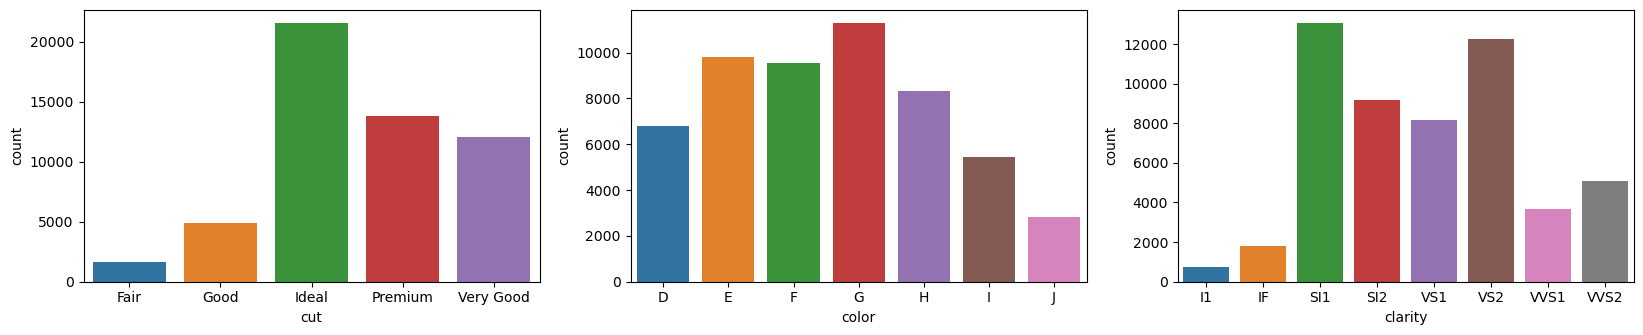

In [9]:
data_cat = ['cut', 'color', 'clarity']
i = 1
plt.figure(figsize=(20, 12))
for c in data_cat:
    plt.subplot(3, 3, i)
    sns.countplot(x=df[c].sort_values())
    i += 1

In [10]:
cut_encoder = LabelEncoder()
df['cut'] = cut_encoder.fit_transform(df['cut'])
color_encoder = LabelEncoder()
df['color'] = color_encoder.fit_transform(df['color'])
clarity_encoder = LabelEncoder()
df['clarity'] = clarity_encoder.fit_transform(df['clarity'])
df['dimensions'] = df['x'] * df['y'] * df['z']
df = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'dimensions', 'price']]
df.head()

,carat,cut,color,clarity,depth,table,dimensions,price
0,0.23,2,1,3,61.5,55.0,38.202030,326
1,0.21,3,1,2,59.8,61.0,34.505856,326
2,0.23,1,1,4,56.9,65.0,38.076885,327
3,0.29,3,5,5,62.4,58.0,46.724580,334
4,0.31,1,6,3,63.3,58.0,51.917250,335


<Axes: >

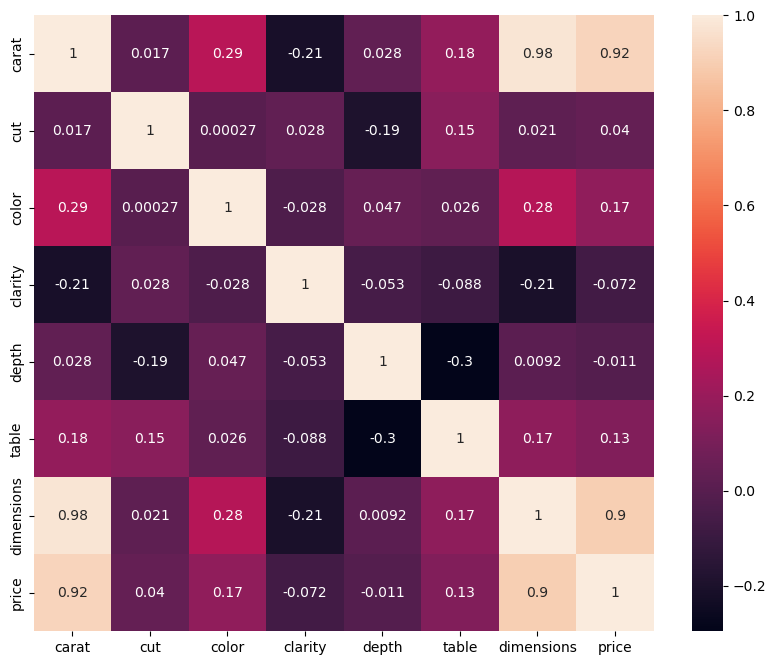

In [11]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)

In [12]:
X = df.drop(['price'], axis=1)
y = df['price']

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train.head()

,carat,cut,color,clarity,depth,table,dimensions
19019,1.01,4,2,7,60.7,59.0,161.241600
2915,1.04,1,6,5,58.2,64.0,166.932920
4960,0.90,1,5,1,63.7,64.0,140.684390
28866,0.37,4,4,2,63.2,57.0,59.884416
42548,0.59,4,1,3,60.5,58.0,99.032883


In [15]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [16]:
def run_experiment(model):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print("MAE :", mean_absolute_error(y_test, y_pred))
    print("MSE :", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    fig = plt.figure()
    plt.scatter(y_test, y_pred)
    fig.suptitle('y_test vs y_pred', fontsize=20)
    plt.xlabel('y_test', fontsize=18)
    plt.ylabel('y_pred', fontsize=16)

MAE : 925.2133297517715
MSE : 1851711.3428769123
RMSE: 1360.7760076062893


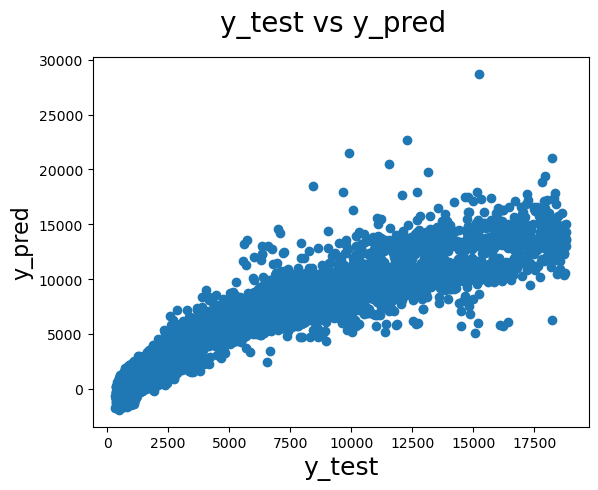

In [17]:
model_1 = LinearRegression()
run_experiment(model_1)

MAE : 363.45491620940237
MSE : 552579.1415583239
RMSE: 743.3566718327911


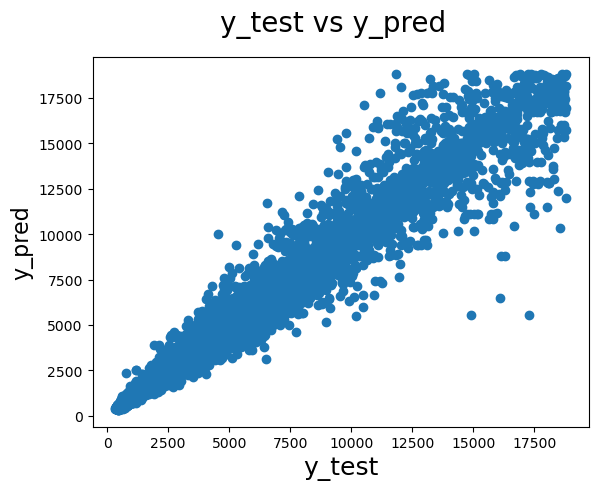

In [18]:
model_2 = DecisionTreeRegressor(random_state=1)
run_experiment(model_2)

MAE : 952.6276280680012
MSE : 2082996.0517795407
RMSE: 1443.2588304872902


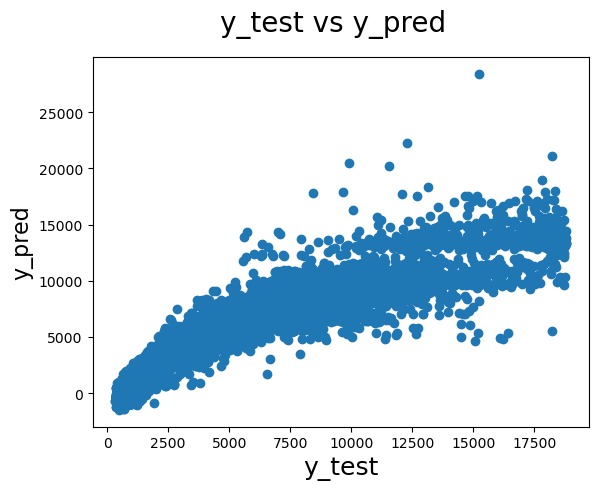

In [19]:
model_3 = Lasso(alpha=0.1, precompute=True, positive=True, selection='random', random_state=1)
run_experiment(model_3)

MAE : 918.6436888968283
MSE : 1853832.212876114
RMSE: 1361.5550715546228


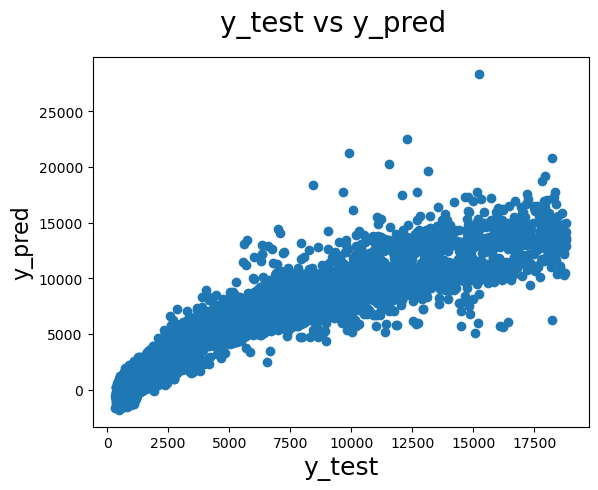

In [20]:
model_4 = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=1)
run_experiment(model_4)

MAE : 284.11971439427776
MSE : 312090.0312829783
RMSE: 558.6501868638176


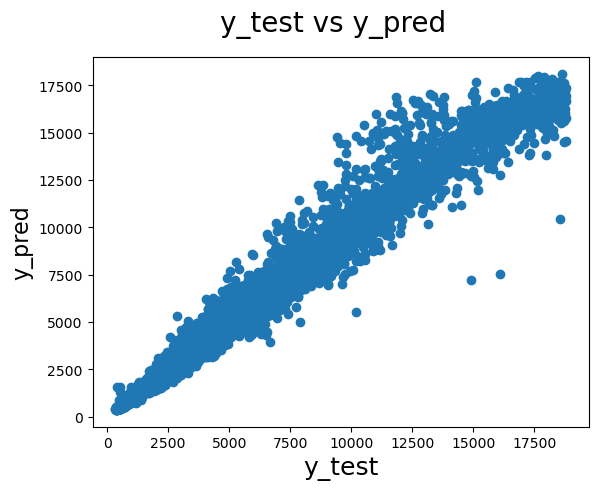

In [21]:
model_5 = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, random_state=1)
run_experiment(model_5)